# Pathrise_Classification

Will a fellow be placed?

### Import All Necessary Packeges

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score
import pickle
from warnings import filterwarnings
filterwarnings('ignore')

### Reading the Preprocessed Dataset 

In [2]:
df=pd.read_csv('Pathrise_Preprocessed_Data.csv')

### Dropping the Target (Placed)

In [3]:
X=df.drop('placed',axis=1)
Y=df['placed']

### Standardizing Values

The inconsistency in the order of variables can lead to errors in machine prediction. To address this issue, the StandardScaler method is employed for standardizing the independent variables. This ensures that all variables undergo a transformation where they have a mean of zero and a standard deviation of one.

In [4]:
transform=preprocessing.StandardScaler()
X_scaled=transform.fit_transform(X)

In [5]:
PCA=PCA(n_components=2)
X_PCA=PCA.fit_transform(X)
print(PCA.explained_variance_ratio_)

[0.96678869 0.02832356]


## Modeling

### Splitting Data

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X_PCA,Y,test_size=0.30,random_state=101)

This function is utilized to visualize the confusion matrix values generated by various machine learning methods through a heatmap plot.

In [7]:
def plot_confusion_matrix (Y,Y_predicted,model_name):
    cm=confusion_matrix(Y,Y_predicted)
    sns.heatmap(data=cm,annot=True,xticklabels=['Did not placed','placed'],yticklabels=['Did not placed','placed'])
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual Lablels')
    plt.title('Confusion Matrix for {} model'.format(model_name))

### The subsequent cells cover the following tasks:
#### A) Selecting four machine learning models, which include:       
1.Logistic Regression       
2.Support Vector Machine        
3.K Nearest Neighbors       
4.Decision Tree       
5.Random Forest       

#### B) Tuning hyperparameters for each model
#### C) Evaluating the performance of each model 

In [8]:
LR=LogisticRegression()
SVM=SVC()
KNN=KNeighborsClassifier()
DT=DecisionTreeClassifier(random_state=101)
RFC=RandomForestClassifier(random_state=101)


list_model=[LR,SVM,KNN,DT,RFC]
LR_param={'C':[0.01,0.1,1],'solver':['lbfgs'],'penalty':['l2']}
SVM_param={'C':[0.5,1,1.5],'kernel':['rbf','poly','sigmoid']}
KNN_param={'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}
DT_param={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[2*n for n in range(1,10)],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'max_features':['auto','sqrt']}
RFC_param={'min_samples_leaf':[1,2,4],'min_samples_split':[2,5],'n_estimators':[10,20,30]}


param={LR:LR_param,SVM:SVM_param,KNN:KNN_param,DT:DT_param,RFC:RFC_param}
list_model_name={LR:'Logistic Regression',SVM:'Support Vector Machine',KNN:'K Nearest Neighbor',DT:'Decision Tree Classifier',RFC:'Random Forest Classifier'}
acc_success={}
acc_fail={}
best_param={}

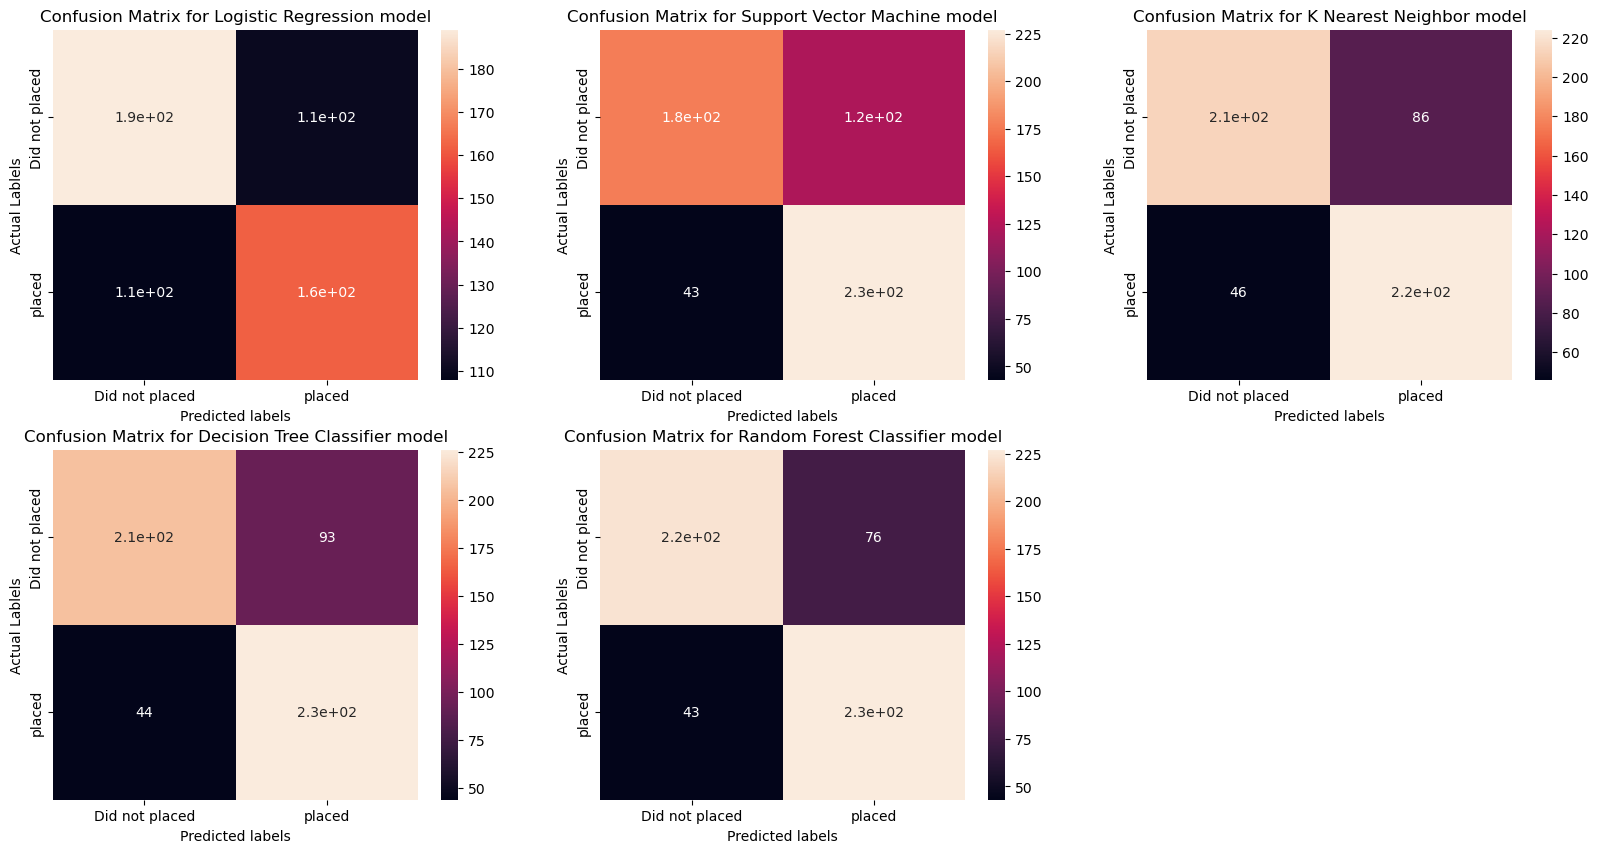

In [9]:
plt.figure(figsize=(20,10),dpi=100)
index=1
for m in list_model:
    model_cv=GridSearchCV(m,param[m],cv=4)
    model_cv.fit(X_train,Y_train)
    Y_predict=model_cv.predict(X_test)
    cr=classification_report(Y_test,Y_predict ,output_dict=True)
    cr['1'].update({'accuracy':cr['accuracy']})
    cr['0'].update({'accuracy':cr['accuracy']})
    acc_success[list_model_name[m]]=cr['1']
    acc_fail[list_model_name[m]]=cr['0']
    plt.subplot(2,3,index)
    plot_confusion_matrix(Y_test,Y_predict,list_model_name[m])
    best_param[list_model_name[m]]=model_cv.best_params_
    index+=1

### Performance Metrics

The following table and bar chart demonstrate performance metrics for evaluating fellow success in being placed of all four models simultaneously.

In [10]:
df_acc_success=pd.DataFrame(acc_success)
df_acc_success=df_acc_success.drop('support',axis=0)
df_acc_success

,Logistic Regression,Support Vector Machine,K Nearest Neighbor,Decision Tree Classifier,Random Forest Classifier
precision,0.595588,0.650430,0.722581,0.708464,0.749175
recall,0.600000,0.840741,0.829630,0.837037,0.840741
f1-score,0.597786,0.733441,0.772414,0.767402,0.792321
accuracy,0.616872,0.710018,0.768014,0.759227,0.790861


<AxesSubplot:>

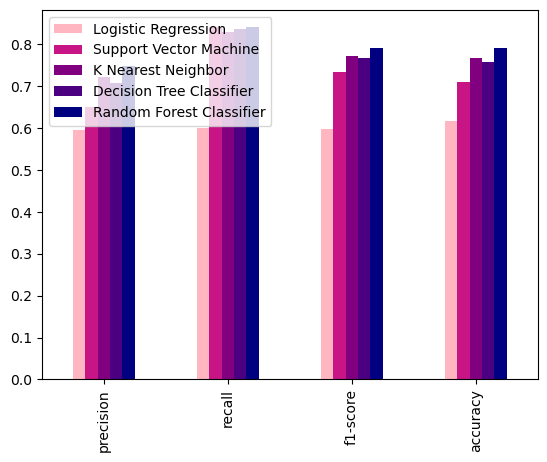

In [11]:
df_acc_success.plot.bar(color=['lightpink','mediumvioletred','purple','indigo','navy'])

The following table and bar chart illustrate performance metrics for evaluating fellow's lack of success in being placed of all four models side by side.

In [12]:
df_acc_fail=pd.DataFrame(acc_fail)
df_acc_fail=df_acc_fail.drop('support',axis=0)
df_acc_fail

,Logistic Regression,Support Vector Machine,K Nearest Neighbor,Decision Tree Classifier,Random Forest Classifier
precision,0.636364,0.804545,0.822394,0.824000,0.838346
recall,0.632107,0.591973,0.712375,0.688963,0.745819
f1-score,0.634228,0.682081,0.763441,0.750455,0.789381
accuracy,0.616872,0.710018,0.768014,0.759227,0.790861


<AxesSubplot:>

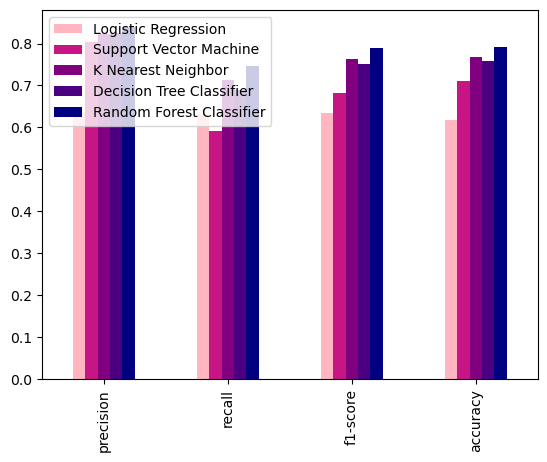

In [13]:
df_acc_fail.plot.bar(color=['lightpink','mediumvioletred','purple','indigo','navy'])

### ROC Curve

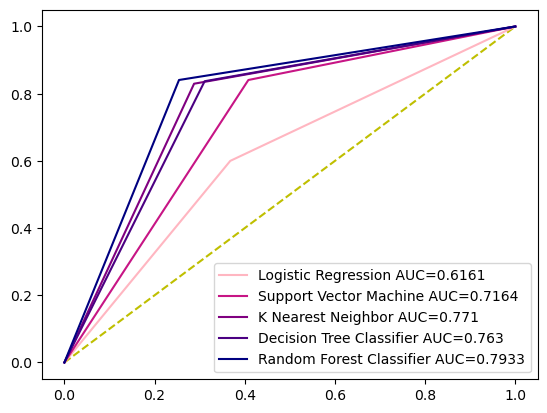

In [14]:
plt.plot([0,1],[0,1],'y--')
colors=['lightpink','mediumvioletred','purple','indigo','navy']
for m in list_model:
    model_cv=GridSearchCV(m,param[m],cv=4)
    model_cv.fit(X_train,Y_train)
    Y_predict=model_cv.predict(X_test)
    fpr,tpr,thresholds= roc_curve(Y_test,Y_predict)
    auc=round(roc_auc_score(Y_test,Y_predict),4)
    plt.plot(fpr,tpr,label=list_model_name[m]+' AUC='+str(auc),color=colors.pop(0))
    plt.legend()

### Best Hyperparameters for Each Model

In [15]:
df_best_param=pd.DataFrame(best_param)
df_best_param

,Logistic Regression,Support Vector Machine,K Nearest Neighbor,Decision Tree Classifier,Random Forest Classifier
C,0.01,1.5,NaN,NaN,NaN
penalty,l2,NaN,NaN,NaN,NaN
solver,lbfgs,NaN,NaN,NaN,NaN
kernel,NaN,rbf,NaN,NaN,NaN
algorithm,NaN,NaN,auto,NaN,NaN
n_neighbors,NaN,NaN,5,NaN,NaN
p,NaN,NaN,1,NaN,NaN
criterion,NaN,NaN,NaN,entropy,NaN
max_depth,NaN,NaN,NaN,8,NaN
max_features,NaN,NaN,NaN,auto,NaN


In [16]:
RFC_CV=RandomForestClassifier(min_samples_leaf=2,min_samples_split=2,n_estimators=30)
RFC_CV.fit(X_train,Y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=30)

### Exporting the Best Model

In [17]:
pickle.dump(RFC_CV,open('Pathrise_Classification.pk1','wb'))